In [1]:
import json
import traceback, sys
import os
import pandas as pd
from micromort.models.trained_models.svm_mean_embeddings import Classifier, MeanEmbeddingVectorizer
from micromort.data_stores.mongodb import getConnection
from micromort.utils.classification_plotter import plot_classification_report

from multiprocessing.dummy import Pool as ThreadPool 

from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report

In [2]:
classifier = Classifier("../resources/trained_models/oneVsAll_linear_SVM_mean_embeddings/")

In [3]:
mongo_db_name = "micromort"
mongo_collection_name = "newstweets_categorized_news"
mongoClient = getConnection(mongo_db_name, mongo_collection_name)

In [4]:
def storeInMongo(collection,  item):

    url = item["url"]
    collection.update({ 
        "url"  : url
        } 
    ,  dict(item),  True)

In [5]:
% export LC_CTYPE=en_US.UTF-8

UsageError: Line magic function `%export` not found.


In [6]:
count=0
for tweet in mongoClient.find():
    count=count+1
    d = tweet["text"]
    labels = classifier.predict_single(d)
    if not len(labels):
        labels = [99]
    tweet["labels"] = labels 
    if count%1000 == 0:
        print tweet["labels"], tweet["url"]
        print count

    storeInMongo(mongoClient, tweet)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  import sys


[99] https://mobile.nytimes.com/2012/10/09/us/us-panel-calls-huawei-and-zte-national-security-threat.html
1000
[99] https://mobile.nytimes.com/2013/12/15/travel/36-hours-in-colombo-sri-lanka.html
2000
[99] https://www.theguardian.com/tv-and-radio/2018/may/16/peter-byrne-obituary?CMP=share_btn_tw
3000
[99] https://www.theguardian.com/tv-and-radio/2018/may/23/the-next-homeland-problems-with-fauda-israel-brutal-tv-hit
4000
[98] https://www.philstar.com/headlines/2018/05/16/1816013/13-senators-back-resolution-questioning-sc-ruling-quo-warranto#YLmfoTFcUwXMJhdc.99
5000
[93] https://www.theguardian.com/environment/2018/may/24/pollutionwatch-air-contamination-drops-by-30-in-china
6000
[99] https://www.nytimes.com/2015/06/17/us/rachel-dolezal-nbc-today-show.html
7000
[99] https://amp-theguardian-com.cdn.ampproject.org/v/s/amp.theguardian.com/environment/2017/oct/05/vast-animal-feed-crops-meat-needs-destroying-planet?usqp=mq331AQCCAE%3D&amp_js_v=0.1
8000
[99] https://www.philstar.com/nation/201

[99] https://www.theguardian.com/media/2018/apr/10/glossy-magazine-covers-too-white-models-black-ethnic-minority?CMP=share_btn_tw
64000
[99] https://www.theguardian.com/media/2018/may/11/netflix-criticised-over-return-of-suicide-drama-13-reasons-why?CMP=share_btn_tw
65000
[99] https://www.nytimes.com/2018/05/25/nyregion/new-york-today-scripps-spelling-bee.html?partner=rss&emc=rss&utm_source=dlvr.it&utm_medium=twitter
66000
[99] https://www.theguardian.com/world/2017/jun/29/pope-francis-announces-five-new-cardinals-including-first-from-mali
67000
[99] https://www.nytimes.com/2018/05/25/us/harvey-weinstein-perp-walk.html
68000
[99] https://www.theguardian.com/world/2017/sep/04/half-uk-population-has-no-religion-british-social-attitudes-survey
69000
[92] https://mobile.nytimes.com/2018/05/22/world/asia/afghanistan-car-bomb-kandahar.html#click=https://t.co/Sc6xfZBjtl
70000
[99] https://www.theguardian.com/world/2018/apr/23/azerbaijan-children-of-president-linked-to-dubai-property-empire
71

[99] https://www.theguardian.com/australia-news/2017/mar/17/kakadu-aerial-cull-kills-more-than-6000-horses-buffalo-and-pigs?CMP=Share_iOSApp_Other
136000
[99] https://www.nytimes.com/video/movies/100000002853200/trailer-8216sex-tape8217.html?smid=tw-share
137000
[98] https://timesofindia.indiatimes.com/india/there-was-murder-of-democracy-in-bengal-pm-modi-slams-mamata-govt-over-panchayat-poll-violence/articleshow/64180117.cms?utm_source=facebook.com&utm_medium=social&utm_campaign=TOI&utm_content=om-bm
138000
[92, 95] http://www.bbc.com/news/world-asia-india-44022550
139000
[99] https://www.nytimes.com/2018/05/15/climate/air-conditioning.html?smid=tw-nytclimate&smtyp=cur
140000
[99] https://www.theguardian.com/travel/2018/may/13/the-flies-that-bind-overindulging-on-the-bellarine-peninsula
141000
[99] https://www.yahoo.com/news/m/142ebdc3-50ce-32ed-bab5-740f0bd5eb62/pope-francis-reassures.html?.tsrc=fauxdal
142000
[98] https://www.theguardian.com/australia-news/audio/2018/may/26/sussan-l

[99] https://www.theguardian.com/books/2018/may/19/last-stories-william-trevor-review-julian-barnes?CMP=Share_AndroidApp_Tweet
207000
[95] https://www.thestar.com.my/news/regional/2018/05/26/thai-monk-defrocked-charged-over-amulet-fraud/
208000
[99] https://www.thestar.com.my/news/nation/2018/05/22/worlds-best-doubles-badminton-player-furious-that-umpire-kept-faulting-his-serve/
209000
[99] https://www.theguardian.com/books/2016/feb/19/reports-neil-gaiman-helping-george-rr-martin-on-winds-of-winter-are-hot-air
210000
[92] http://www.freemalaysiatoday.com/category/nation/2018/05/19/british-tourist-beaten-unconscious-in-penang-brawl/
211000
[98] http://www.hrc.org/realmikepence
212000
[99] http://www.freemalaysiatoday.com/category/nation/2018/05/16/talks-on-myanmar-airline-have-stopped-says-airasia-chief/
213000
[94] https://finance.yahoo.com/news/concession-trump-help-chinas-zte-010357730.html?.tsrc=fauxdal
214000
[99] http://www.thejakartapost.com/life/2018/05/24/facebook-launches-free

[94] https://www.japantimes.co.jp/news/2018/05/24/national/politics-diplomacy/abe-expresses-hope-peace-treaty-progress-departs-summit-putin/?utm_source=dlvr.it&utm_medium=twitter
272000
[99] https://hindi.news18.com/news/bihar/jamui-wife-of-jdu-spokesperson-pragati-mehta-sucide-in-jamui-1388224.html
273000
[99] http://www.bbc.com/news/world-us-canada-30103078
274000
[98] http://www.bbc.com/news/world-latin-america-44187838?utm_source=Evening+Brief&utm_campaign=f3219891c1-EMAIL_CAMPAIGN_2016_12_02&utm_medium=email&utm_term=0_2c2117a06e-f3219891c1-206646957
275000
[92] https://www.washingtontimes.com/news/2018/may/24/louies-grill-bar-oklahoma-city-armed-citizen-fatal/?utm_campaign=shareaholic&utm_medium=twitter&utm_source=socialnetwork
276000
[92, 95] https://indiatimes4you.blogspot.com/2018/05/are-you-type-d-athlete-relax-and-ask.html
277000
[92] http://indianexpress.com/article/world/a-year-on-uk-remembers-manchester-arena-bombing-that-killed-22-people-5186186/
278000
[99] http://india

### Evaluate the model

In [28]:
data = pd.read_csv("../../data/annotator_data_dump_with_text")

In [200]:
preds = []
gd = []
for i, d in data.iterrows():
    try:
        p = classifier.predict_single(d["summary"].decode('utf-8').strip())
        if not len(p):
            p = [99]
        preds.append(tuple(p))
        if "-1" in d["category"]:
            d["category"].remove("-1")
        gd.append(tuple([int(a)for a in d["category"]]))
        #c = d["category"]
        #gd.append(set(c[1:len(c)-1].split(" ")))
        #data.category[0][1:len(data.category[0])-1].split(" ")
    except Exception as e:
        pass

In [201]:
class_mapping = {91: 'health', 92: 'safety_security', 93 : 'environment',
                      94 : 'social_relations', 95 : 'meaning_in_life', 96 : 'achievement',
                      97 : 'economics', 98 : 'politics', 99 : 'not_applicable', 0 : 'skip' }
mlb = MultiLabelBinarizer(classes=sorted(class_mapping.keys()))
_gd = mlb.fit_transform(gd)
_preds = mlb.transform(preds)

In [192]:
accuracy_score(_gd,_preds)

0.557830658550083

/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


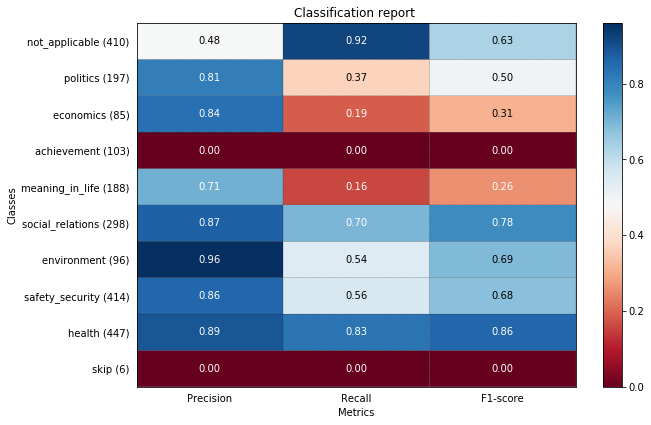

In [193]:
plot_classification_report(classification_report(_gd, _preds, target_names= [ 'skip',
'health','safety_security',  'environment', 'social_relations', 'meaning_in_life', 'achievement', 
'economics',  'politics', 'not_applicable']))

In [196]:
accuracy_score(_gd,_preds)

0.41092896174863386

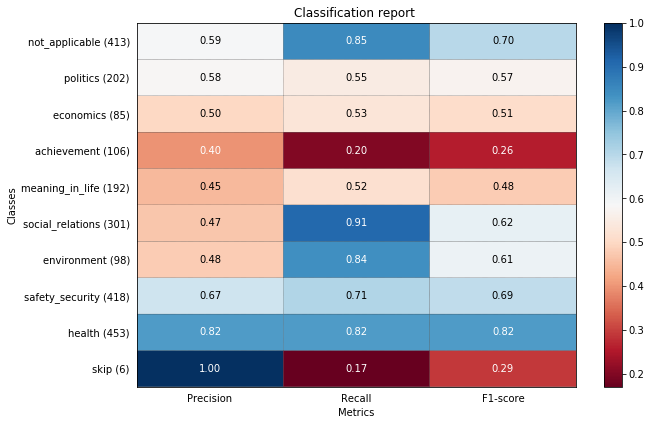

In [198]:
plot_classification_report(classification_report(_gd, _preds, target_names= [ 'skip',
'health','safety_security',  'environment', 'social_relations', 'meaning_in_life', 'achievement', 
'economics',  'politics', 'not_applicable']))

In [202]:
accuracy_score(_gd,_preds)

0.5672131147540984

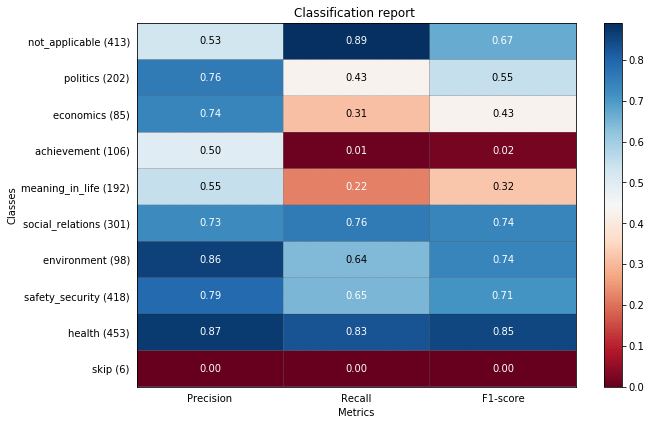

In [203]:
plot_classification_report(classification_report(_gd, _preds, target_names= [ 'skip',
'health','safety_security',  'environment', 'social_relations', 'meaning_in_life', 'achievement', 
'economics',  'politics', 'not_applicable']))